## Прогнозы и предсказания

<div style="border:solid blue 2px; padding: 20px"> 

Сеть фитнес-центров разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
    
Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.  
А именно:  
научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;  
сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;  
проанализировать основные признаки, наиболее сильно влияющие на отток;  
сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:  
1) выделить целевые группы клиентов;  
2) предложить меры по снижению оттока;  
3) определить другие особенности взаимодействия с клиентами.  
    
1. [Шаг 1. Загрузите данные](#step1)  
2. [Шаг 2. Проведите исследовательский анализ данных (EDA)](#step2)  
3. [Шаг 3. Постройте модель прогнозирования оттока клиентов](#step3)  
4. [Шаг 4. Сделайте кластеризацию клиентов](#step4)  
5. [Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами](#step5)      

</div>

## <a id="step1"></a>   Шаг №1. Загрузка данных

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [2]:
try:
    data = pd.read_csv('/datasets/gym_churn.csv')
except:
    data = pd.read_csv('E:/Яндекс_DA/Модуль_3_DA/M3_Спр2_ПрогнзПред/gym_churn.csv')

In [3]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


## <a id="step2"></a>  Шаг №2.  Проведите исследовательский анализ данных (EDA)

In [5]:
data.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [6]:
data.duplicated().sum()

0

<div style="border:solid blue 2px; padding: 20px"> 
Нет пропущенных значений и дубликатов

#### Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe()

In [7]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


#### Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby()

In [8]:
data_mean = data.groupby(['Churn']).agg({'mean'}).reset_index()

In [9]:
data_mean

,Churn,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


#### Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

In [10]:
data_chr_1 = data[data['Churn']==1]

In [11]:
data_chr_0 = data[data['Churn']==0]

In [12]:
Name_kol = ['Age','Lifetime','Contract_period','Month_to_end_contract',
        'Avg_class_frequency_total','Avg_class_frequency_current_month', 'Avg_additional_charges_total']

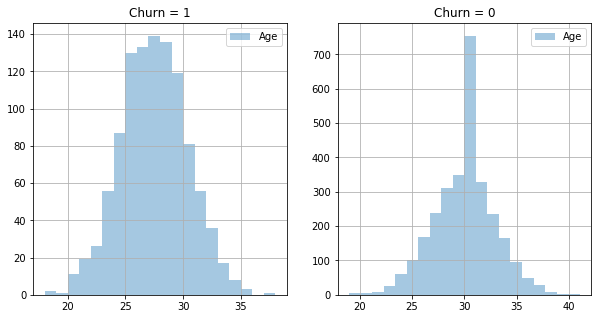

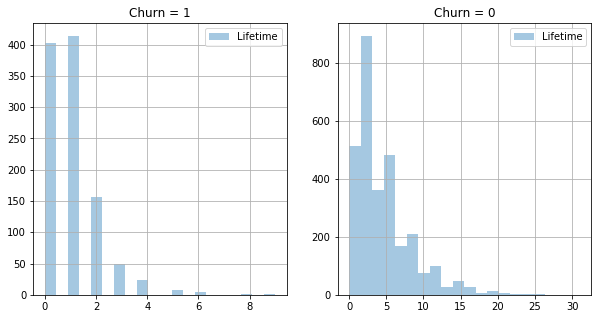

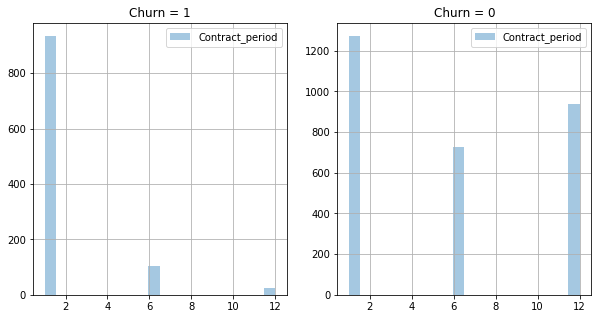

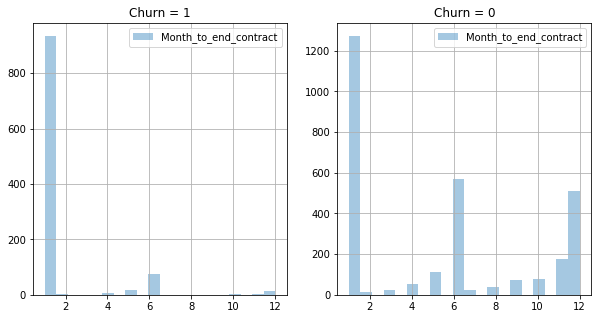

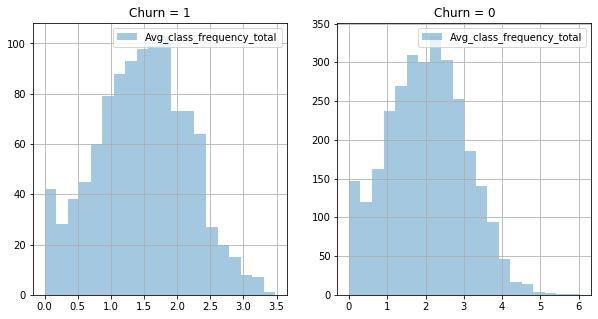

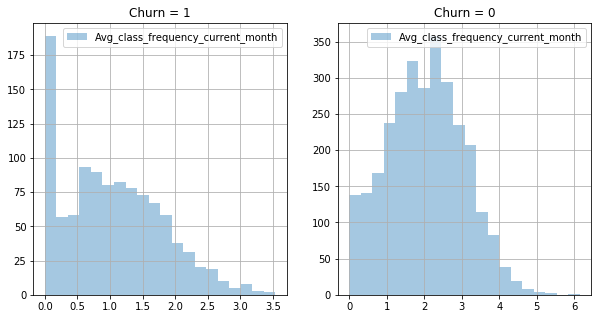

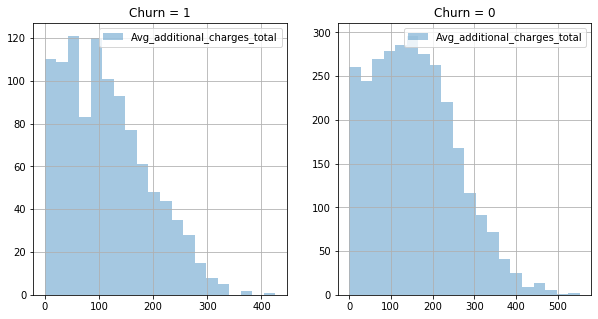

In [13]:

for rest_name in Name_kol:
    
    plt.subplots(figsize = (10,5))
    data_chr_1[rest_name].hist(alpha = 0.4,  bins = 20, label = rest_name, ax = plt.subplot(1, 2, 1)) 
    plt.title('Churn = 1')
    legend = plt.legend();
    data_chr_0[rest_name].hist(alpha = 0.4,  bins = 20, label = rest_name, ax = plt.subplot(1, 2, 2))    
    plt.title('Churn = 0')
    legend = plt.legend();

<div style="border:solid blue 2px; padding: 20px"> 

Из графиков распределений и таблицы средних значений видим, что:  
Средний возраст у лояльных клиентов немного выше - 30 лет.  
У лояльных клиентов (те кто не попал в отток) больше полугодовых и годовых обониментов, соответственно и времени до окончания абонимента.  
У лояльных клиентов в среднем выше частота посещений в неделю, это около 2 раз , против 1,5 раз.  
И в среднем лояльные клиенты тратят немного больше на доп. услуги - 158 , против 115. 
</div>


In [14]:
Name_kach = ['gender','Near_Location','Partner', 'Promo_friends', 'Phone', 'Group_visits']

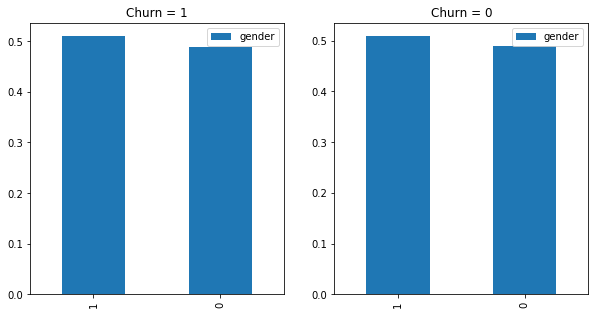

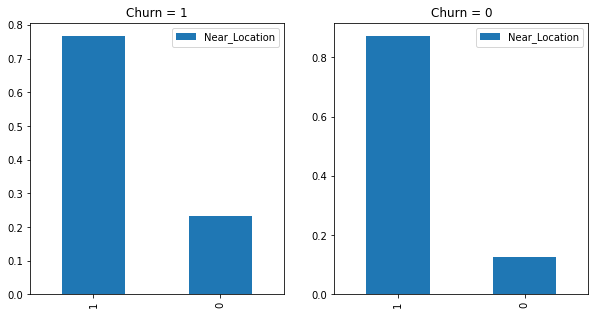

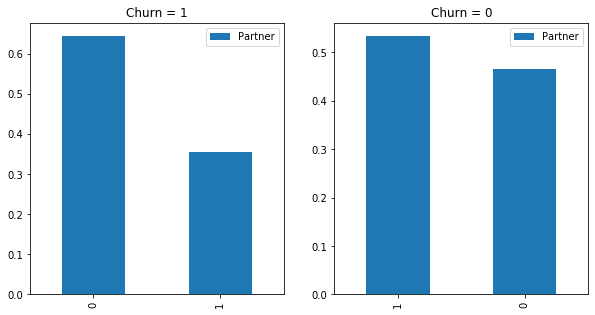

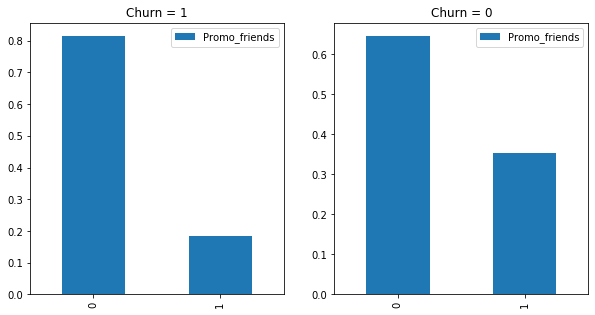

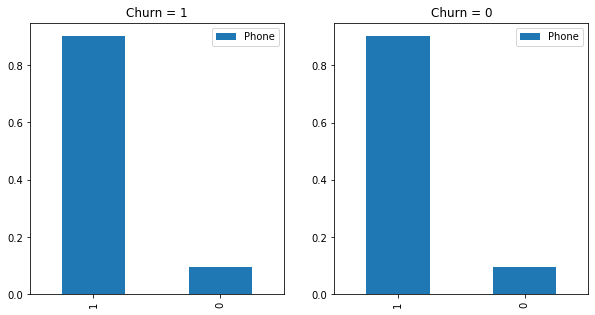

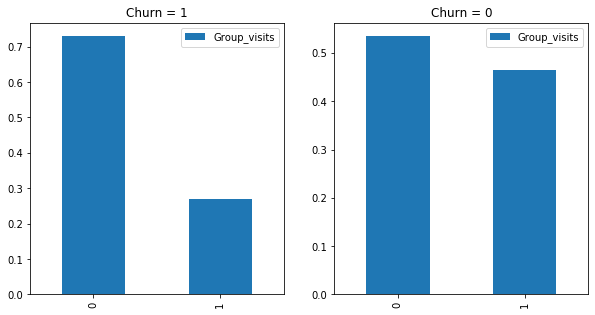

In [15]:
for rest_name in Name_kach:
    plt.subplots(figsize = (10,5))
    class_frequency = data_chr_1[rest_name].value_counts(normalize=True)
    class_frequency.plot(kind='bar', ax = plt.subplot(1, 2, 1))
    plt.title('Churn = 1')
    legend = plt.legend();
    class_frequency = data_chr_0[rest_name].value_counts(normalize=True)
    class_frequency.plot(kind='bar', ax = plt.subplot(1, 2, 2))
    plt.title('Churn = 0')
    legend = plt.legend();

<div style="border:solid blue 2px; padding: 20px"> 
  
Лояльные клиенты больше посещают групповые занятия.  
Больше лояльных клиентов пришло по партнерской программе или в рамках акции «приведи друга»
</div>

#### Постройте матрицу корреляций и отобразите её.

In [16]:
matrix = data[Name_kol]

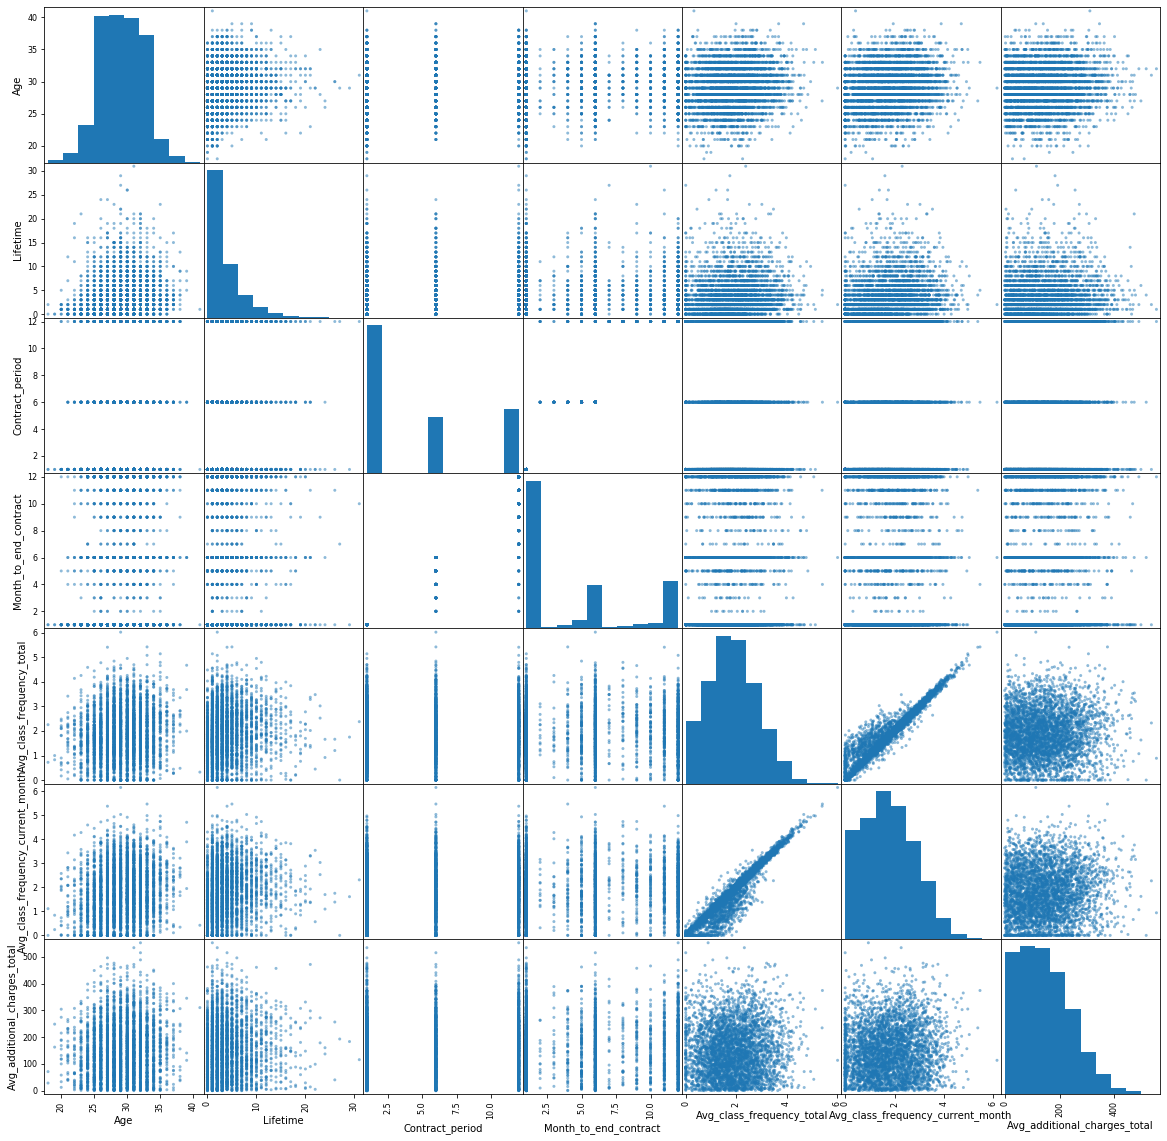

In [17]:
pd.plotting.scatter_matrix(matrix, figsize=(20, 20));

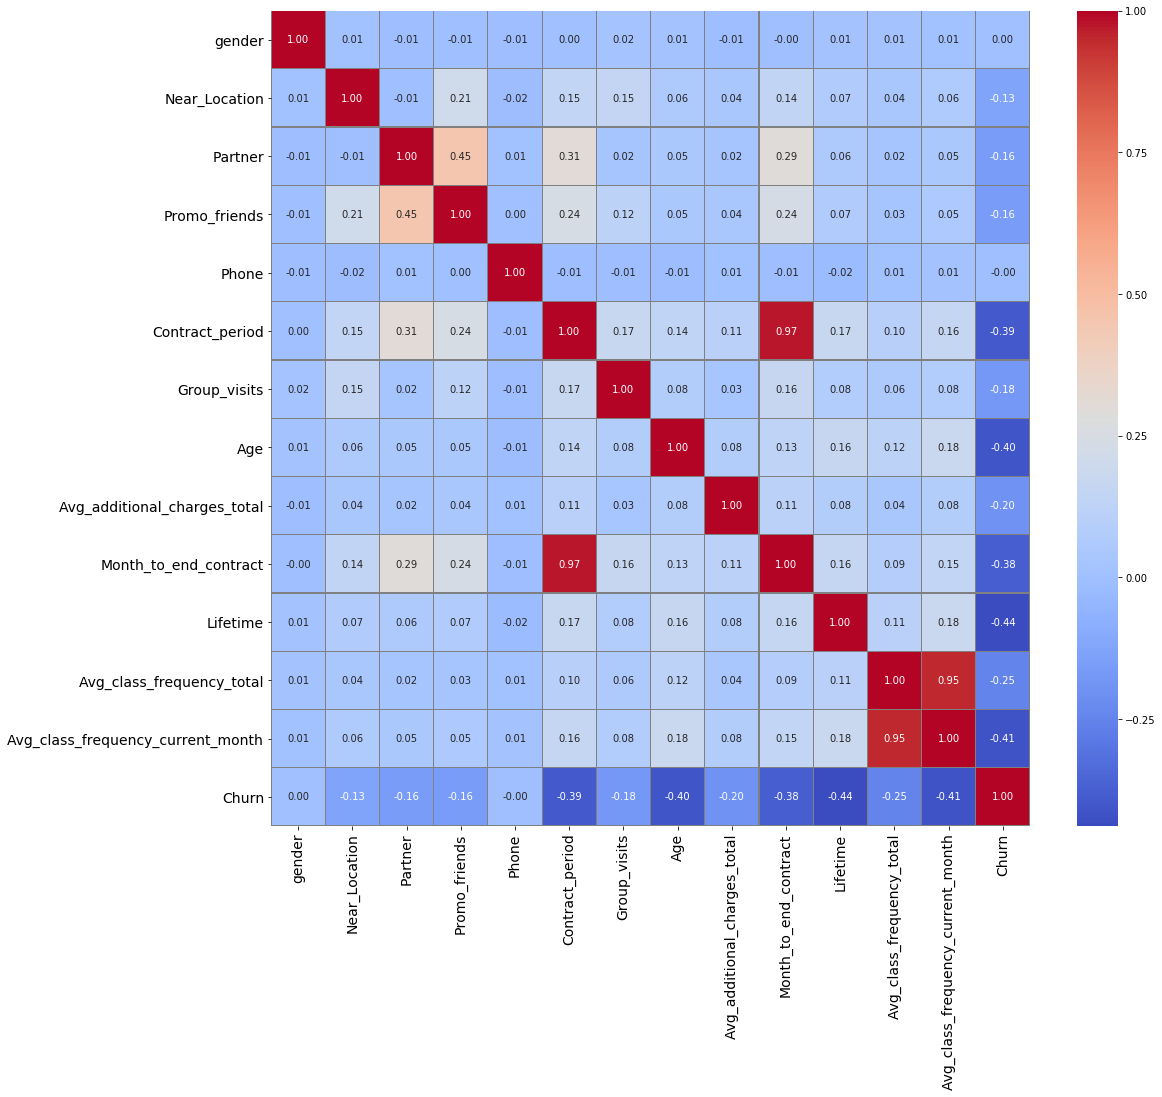

In [18]:
corrmat = data.corr()

f, ax = plt.subplots(figsize =(17, 15))
ax.tick_params(axis = 'both',  
               labelsize = 14)
sns.heatmap(corrmat, ax = ax, cmap ="coolwarm", fmt='.2f', linewidths = 0.2, annot=True, linecolor='gray');

<div style="border:solid blue 2px; padding: 20px"> 
Видим сильную корреляцию между парами:
    
`Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
`Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;  
Те , кто ходили на прошлой неделе - посещают регулярно.  

`Contract_period` — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);  
`Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);  
Тоже логично, чем больше длительность текущего абонимента, тем больше срок до его окончания
</div>

## <a id="step3"></a> Шаг 3. Постройте модель прогнозирования оттока клиентов

In [19]:
data

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


0    0.73475
1    0.26525
Name: Churn, dtype: float64


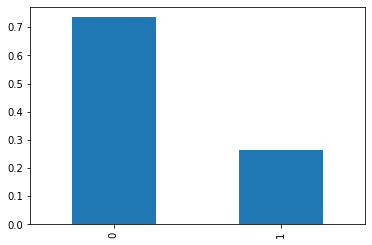

In [20]:
class_frequency = data['Churn'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar');

<div style="border:solid blue 2px; padding: 20px"> 
Видим дисбаланс целевого класса, поэтому в моделях применяем `class_weight = 'balanced'`

In [21]:
X = data.drop('Churn', axis = 1)
y = data['Churn']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

<div style="border:solid blue 2px; padding: 20px"> 
применим технику `upsampling` для устранения дисбаланса

In [23]:
from sklearn.utils import shuffle
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [24]:
X_train_upsampled, y_train_upsampled = upsample(X_train, y_train, 3)

1    0.522005
0    0.477995
Name: Churn, dtype: float64


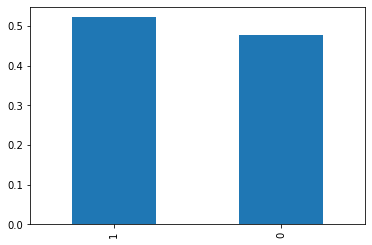

In [25]:
class_frequency = y_train_upsampled.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

In [26]:
print(X_train_upsampled.shape)
print(y_train_upsampled.shape)

(4908, 13)
(4908,)


In [27]:
scaler = StandardScaler()
scaler.fit(X_train_upsampled)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
# Преобразуйте обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train_upsampled)
X_test_st = scaler.transform(X_test)

#### LogisticRegression

In [29]:
model_L = LogisticRegression(random_state=12345, class_weight = 'balanced')
model_L.fit(X_train_st, y_train_upsampled)

predictions = model_L.predict(X_test_st)
probabilities = model_L.predict_proba(X_test_st)[:,1]


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
print('Метрики для логистической регрессии')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Метрики для логистической регрессии
Accuracy: 0.90
Precision: 0.76
Recall: 0.91


#### RandomForestClassifier

Рассмотрим алгоритм классификации — случайный лес, изменяю количество деревьев в лесу

In [31]:
for estim in range(10, 120, 10):
    model_RFC = RandomForestClassifier(random_state=12345, n_estimators=estim, class_weight = 'balanced')
    
    model_RFC.fit(X_train_st, y_train_upsampled)   
    predict_RFC = model_RFC.predict(X_test_st)
    
    precision = precision_score(y_test, predict_RFC)
    recall =  recall_score(y_test, predict_RFC)
    f1 = f1_score(y_test, predict_RFC)
    print("n_estimators = {:.1f}, Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}".format(estim, precision, recall, f1))

n_estimators = 10.0, Точность = 0.855, Полнота = 0.797, F1 = 0.825
n_estimators = 20.0, Точность = 0.824, Полнота = 0.816, F1 = 0.820
n_estimators = 30.0, Точность = 0.824, Полнота = 0.792, F1 = 0.808
n_estimators = 40.0, Точность = 0.805, Полнота = 0.797, F1 = 0.801
n_estimators = 50.0, Точность = 0.812, Полнота = 0.812, F1 = 0.812
n_estimators = 60.0, Точность = 0.813, Полнота = 0.821, F1 = 0.817
n_estimators = 70.0, Точность = 0.817, Полнота = 0.821, F1 = 0.819
n_estimators = 80.0, Точность = 0.824, Полнота = 0.816, F1 = 0.820
n_estimators = 90.0, Точность = 0.823, Полнота = 0.787, F1 = 0.805
n_estimators = 100.0, Точность = 0.817, Полнота = 0.797, F1 = 0.807
n_estimators = 110.0, Точность = 0.816, Полнота = 0.812, F1 = 0.814


In [32]:
model_RFC = RandomForestClassifier(random_state=12345, n_estimators=90, class_weight = 'balanced')

In [33]:
model_RFC.fit(X_train_st, y_train_upsampled)   
predict_RFC = model_RFC.predict(X_test_st)

In [34]:
print('Метрики для для случайного леса')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predict_RFC)))
print('Precision: {:.2f}'.format(precision_score(y_test, predict_RFC)))
print('Recall: {:.2f}'.format(recall_score(y_test, predict_RFC)))

Метрики для для случайного леса
Accuracy: 0.90
Precision: 0.82
Recall: 0.79


<div style="border:solid blue 2px; padding: 20px"> 
    
`Accuracy` для обоих моделей не отличается.  
У логистической регрессии больше `Recall`: 0.91, а у случайного леса `Precision`: 0.82.

`Precision` можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными, а `Recall` показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.
    
В данном случае нам важнее метрика `Precision`. Т.е. ничего сташного , если мы маркировали клиента , что он ушел в отток, а на самом деле - нет. Просто лояльному клиенту предложим , допустим, скидку. Это дешевле, чем не "отловить" клиента , который ушел.
    
Следовательно выбираем модель - случайного леса.
</div>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий-2</b><br>
метрики не сильно изменились

## <a id="step4"></a> Шаг 4. Сделайте кластеризацию клиентов

In [35]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 

Берем данные без столбца `Churn`

In [36]:
sc = StandardScaler()
x_sc = sc.fit_transform(X)

In [37]:
linked = linkage(x_sc, method = 'ward')

In [38]:
linked

array([[9.70000000e+01, 3.22200000e+03, 1.00990653e-01, 2.00000000e+00],
       [2.61000000e+02, 3.17900000e+03, 1.22634574e-01, 2.00000000e+00],
       [8.90000000e+02, 1.75000000e+03, 1.28123291e-01, 2.00000000e+00],
       ...,
       [7.98700000e+03, 7.99500000e+03, 8.38725499e+01, 2.65600000e+03],
       [7.98800000e+03, 7.99600000e+03, 8.89563592e+01, 3.03400000e+03],
       [7.99200000e+03, 7.99700000e+03, 1.04627601e+02, 4.00000000e+03]])

#### Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму.

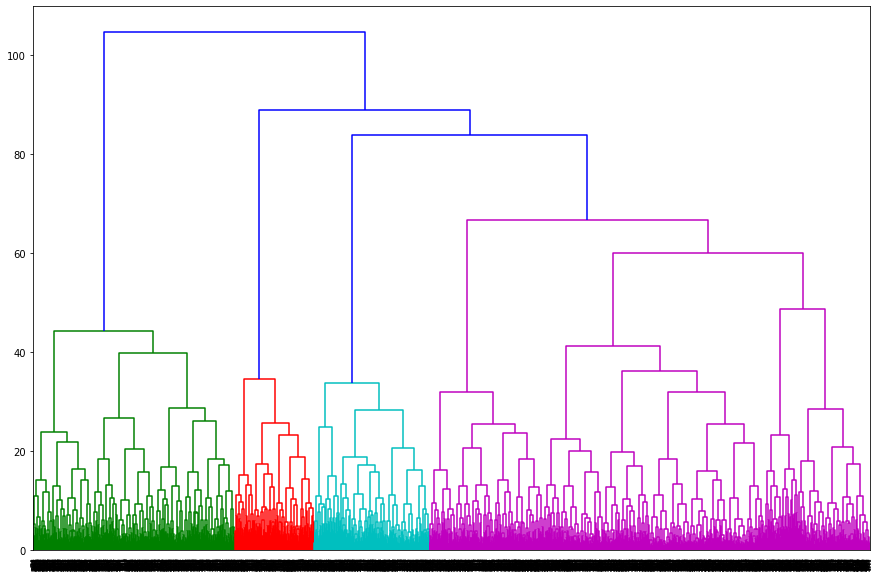

In [39]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show()

По условию выделим 5 кластеров

In [40]:
km = KMeans(n_clusters = 5, random_state=12345)

In [41]:
labels = km.fit_predict(x_sc)

In [42]:
data['cluster_km'] = labels

#### Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?

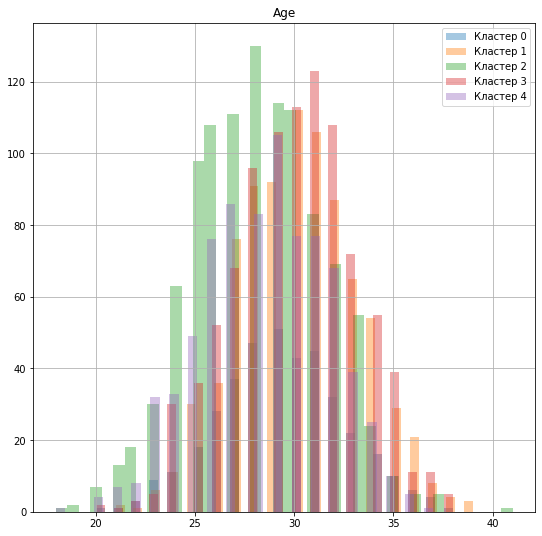

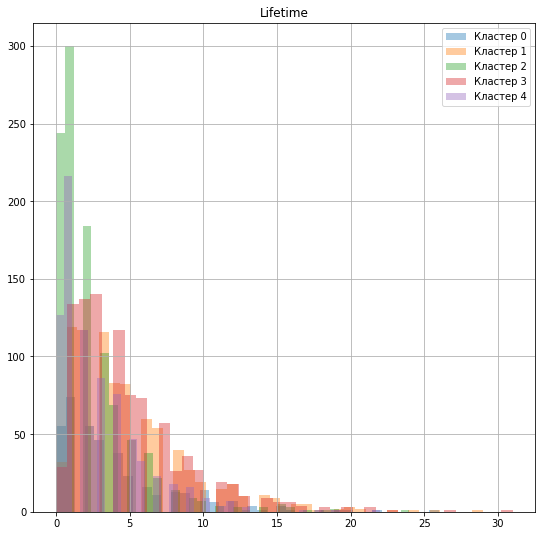

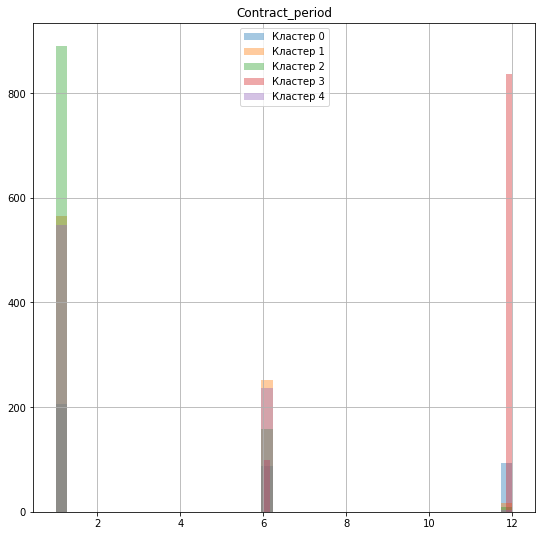

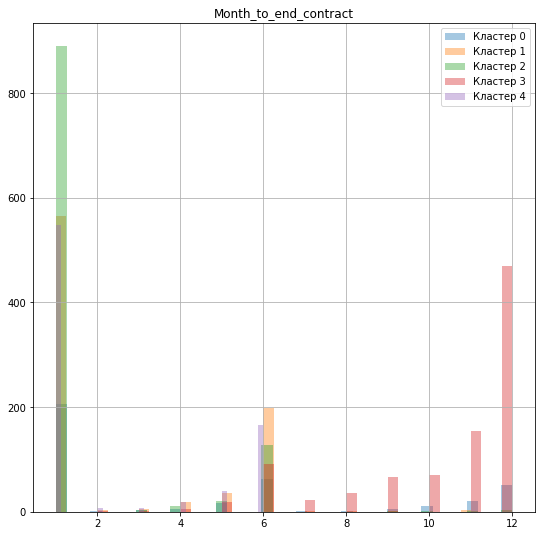

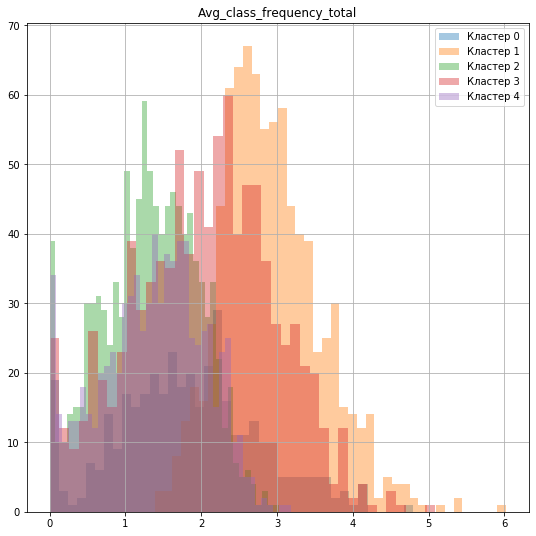

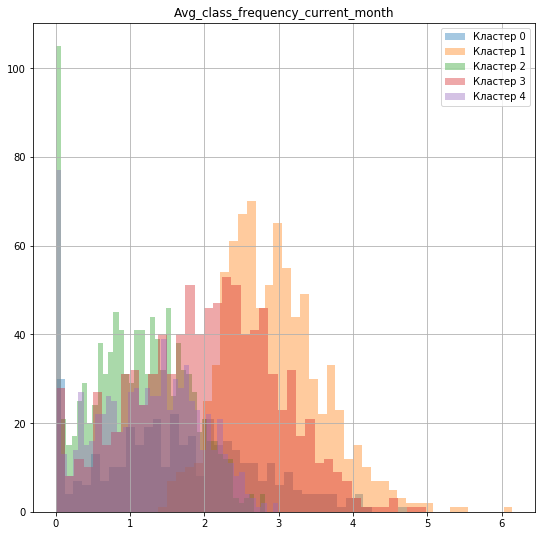

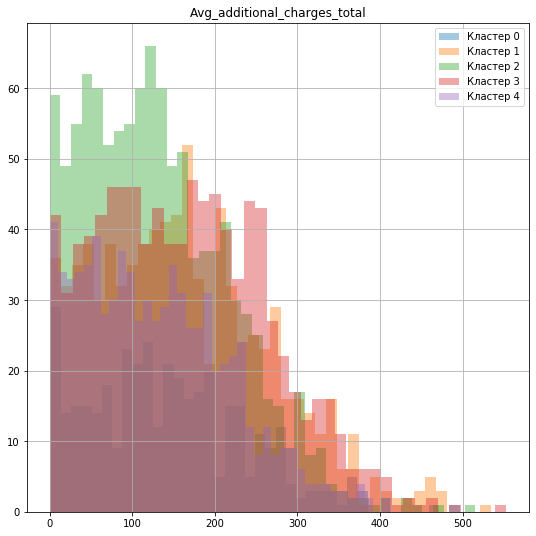

In [43]:
for name in Name_kol:   
    plt.subplots(figsize = (9,9))
    ax = plt.gca()
    for cluster in range(5):
        data_km = data.query('cluster_km == @cluster')  
        data_km[name].hist(alpha = 0.4, bins = 40,  label = 'Кластер ' + str(cluster))
        #plt.xlim(-5, 300)
        plt.title(name)
        legend = plt.legend();

In [44]:
# выводим статистику по средним значениям наших признаков по кластеру
data.groupby('cluster_km').agg({'Churn': 'mean'})

,Churn
cluster_km,
0,0.267532
1,0.050360
2,0.552408
3,0.023504
4,0.393130


<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий-2</b><br>
    
Наиболее вероятный клиент , который уходит в отток - это клиент из кластера-0 и кластера-4. Опишем их:  
1. Они моложе по сравнению с клиентами из других кластеров в среднем на 2-3 года (им около 27 лет).  
2. В основном у них абонменты на 1 месяц.  
3. В среднем они ходят в спортзал реже - 1-2 раза в неделю.  
4. В среднем платят меньше за доп. услуги.  


## <a id="step5"></a> Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами

Собрал выводы

<div style="border:solid blue 2px; padding: 20px"> 

Из графиков распределений и таблицы средних значений видим, что:  
Средний возраст у лояльных клиентов немного выше - 30 лет .  
У лояльных клиентов (те кто не попал в отток) больше полугодовых и годовых обониментов, соответственно и времени до окончания абонимента.  
У лояльных клиентов в среднем выше частота посещений в неделю, это около 2 раз , против 1,5 раз.  
И в среднем лояльные клиенты тратят немного больше на доп. услуги - 158 , против 115. 
</div>


<div style="border:solid blue 2px; padding: 20px"> 
  
Лояльные клиенты больше посещают групповые занятия.  
Больше лояльных клиентов пришло по партнерской программе или в рамках акции «приведи друга»
</div>

<div style="border:solid blue 2px; padding: 20px"> 
    
`Accuracy` для обоих моделей не отличается.  
У логистической регрессии больше `Recall`: 0.91, а у случайного леса `Precision`: 0.86.

`Precision` можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными, а `Recall` показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.
    
В данном случае нам важнее метрика `Precision`. Т.е. ничего сташного , если мы маркировали клиента , что он ушел в отток, а на самом деле - нет. Просто лояльному клиенту предложим , допустим, скидку. Это дешевле, чем не "отловить" клиента , который ушел.
    
Следовательно выбираем модель - случайного леса.
</div>

### Сформулируйте основные выводы и предложите рекомендации для стратегии взаимодействия с клиентами и их удержания.

<div style="border:solid blue 2px; padding: 20px">    
    <h1 style="color:blue; margin-bottom:20px">Рекомендации для маркетинга</h1>

   Придумать программы для более молодых (<30) клиентов. Запустить акции на годовые и полугодовые абонименты. Развивать партнерские программы.       
</div>